# Execute [v1.1FirstPart...] before executing this file
# Use kernel 'second' to execute this file
# Import necessary libraries.

In [1]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
#import textacy.keyterms
import textacy.ke
#import neuralcoref
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from allennlp_models.pretrained import load_predictor
predictor = load_predictor("roberta-sst")
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections

from nltk.corpus import stopwords
set(stopwords.words('english'))


from pd_replicator import replicator

nlp = spacy.load("en_core_web_sm")
#neuralcoref.add_to_pipe(nlp)

import pysmile
pysmile.License((
	b"SMILE LICENSE c978699b 97c07af6 f69b7377 "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: damx5dd4ezqly012c37ko4l9i "
	b"Issued for: Solat Jabeen (solatjabeen@gmail.com) "
	b"Academic institution: Institute of Business Administration "
	b"Valid until: 2024-02-05 "
	b"Issued by BayesFusion activation server"
	),[
	0x73,0x67,0x28,0xba,0x6a,0x03,0x97,0x7f,0x5b,0x89,0x34,0xc7,0xc1,0x5a,0x5a,0xb3,
	0xec,0x9e,0x9e,0x6a,0x09,0xd5,0xc2,0x93,0xb4,0x57,0x24,0xc9,0x3d,0xf8,0x8d,0x25,
	0x96,0xbd,0x56,0xb8,0x3c,0xad,0x98,0x00,0xcb,0x27,0xa2,0x28,0x4b,0x1f,0x76,0xb1,
	0x92,0x1a,0x65,0x41,0xd6,0xbe,0x12,0xa3,0x4b,0x60,0x83,0x3f,0x57,0x1d,0xf7,0x23])

# Read text file and preprocess.

In [2]:
raw_sentences = []

my_file = open("./Text/AfterNeuralcoref.txt", "r")
  
data = my_file.read()
  
raw_sentences = data.split("\n")
#print(data_into_list)
my_file.close()

print(len(raw_sentences))
print('\nNLTK Sentences:\n')
for sent in raw_sentences:
    print(sent)

24

NLTK Sentences:

institutional weakness hindered development of the agriculture sector.
land rights disagreements are a major source of conflict.
conflict discourages farmers from expanding production.
conflict discourages traders from building marketing infrastructure.
conflict discourages retailers from building marketing infrastructure.
the low level of public investment shows that no irrigation infrastructure exists.
the low level of public investment shows that only 2 percent of south sudan's limited road network is paved.
roads are poorly maintained.
roads are not repaired.
roads are completely washed out during the rainy season.
inadequate transportation infrastructure has resulted in less transport to markets.
moderate to heavy rainfall is expected to continue during the next two weeks across sudan moderate to heavy rainfall is expected to continue during the next two weeks across south sudan.
moderate to heavy rainfall is expected to continue during the next two weeks acro

# Extract the Subject-Verb-Object triples.

In [3]:
#new
finalList = []
sentences = []
ncl = []
nncl = [()]
checkPass = False
rootCheck = False
varForm1 = False
varForm2 = False
sub = ''
obj = ''
#tuple =('a','b','c')

#print(tuple[0])

for sent in raw_sentences:
    sent = nlp(sent)
    print("Sentence:")
    print(sent)
    
    print("Noun Chunks:")
    for nc in sent.noun_chunks:
        print (nc)
        ncl.append(nc)
    print ("Number of noun chunks: ", len(ncl))
    
    triplets = textacy.extract.subject_verb_object_triples(sent)
    triplets = list(triplets)
    if len(triplets) > 0:
        print("Triples from textacy:")
        for t in triplets:
            subject = t[0]
            objec = t[2]
            for chunk in ncl:
                for cToken in chunk:
                    if str(cToken) == str(t[0]):
                        subject = chunk
                    if str(cToken) == str(t[2]):
                        objec = chunk
            tup = (subject,t[1],objec)
            print(tup)
            finalList.append(tup)
            sentences.append(sent)
        if len(ncl) == 3:
            nncl = [(ncl[0],triplets[0][1],ncl[1])]
            nncl.append((ncl[0],triplets[0][1],ncl[2]))
            print("Triples other than textacy:")
            print(nncl[0])
            print(nncl[1])
            finalList.append(nncl[0])
            sentences.append(sent)
            finalList.append(nncl[1])
            sentences.append(sent)
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],triplets[0][1],ncl[1])]
#            print("Triples other than textacy:")
#            print(nncl[0])
#            finalList.append(nncl[0])
    else:
        print("Method from textacy; subject_verb_object_triples extracted nothing!")
        for token in sent:
            #print(token.text, token.dep_,)
            if token.dep_ == 'nsubj':
                sub = token
                #tuple[0] = str(token.text)
            elif token.dep_ == 'nsubjpass':
                checkPass = True
                sub = token
            elif token.dep_ == 'ROOT':
                #print("Heyyyyyyy")
                verb = token
                #print(verb)
                rootCheck = True
            elif token.pos_ == 'NOUN' and token.dep_ == 'conj':
                if rootCheck is True:
                    varForm2 = True
                else:
                    varForm1 = True
                #tuple[1] = token.text
            #elif token.dep_ == 'dobj':
            #    obj = token.text
                #tuple[2] = token.text
            #    break
            else:
                if token.dep_ == 'dobj':
                    obj = token
                    continue
                elif token.dep_ == 'pobj':
                    obj = token
                    continue
                
        for nChunk in ncl:
            for nToken in nChunk:
                if str(nToken) == str(sub):
                    sub = nChunk
                if str(nToken) == str(obj):
                    obj = nChunk
        if checkPass is True:
            tuple = (obj,verb,sub)
        else:
            tuple = (sub,verb,obj)
        print("Triple by combining nsubj, root and dobj:")
        print(tuple)
        finalList.append(tuple)
        sentences.append(sent)
        if len(ncl) == 3:
            if varForm1 == True:
                nncl = [(ncl[0],verb,ncl[2])]
                nncl.append((ncl[1],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            else:
                nncl = [(ncl[0],verb,ncl[1])]
                nncl.append((ncl[0],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],verb,ncl[1])]
#            print("Triples other than sub, verb and obj:")
#            print(nncl[0])
#            finalList.append(nncl[0])

    ncl.clear()
    nncl.clear()
    rootCheck = False
    checkPass = False
    varForm1 = False
    varForm2 = False
    
trips = finalList

#        for token in nc:
#            print(token.text, token.dep_)

Sentence:
institutional weakness hindered development of the agriculture sector.
Noun Chunks:
institutional weakness
development
the agriculture sector
Number of noun chunks:  3
Triples from textacy:
(institutional weakness, hindered, development)
Triples other than textacy:
(institutional weakness, hindered, development)
(institutional weakness, hindered, the agriculture sector)
Sentence:
land rights disagreements are a major source of conflict.
Noun Chunks:
land rights disagreements
a major source
conflict
Number of noun chunks:  3
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
(land rights disagreements, are, conflict)
Triples other than sub, verb and obj:
(land rights disagreements, are, a major source)
(land rights disagreements, are, conflict)
Sentence:
conflict discourages farmers from expanding production.
Noun Chunks:
conflict
farmers
production
Number of noun chunks:  3
Triples from textacy:
(conflict, discourages

# Remove Duplicates from Triples

In [4]:
#causeffect = list(dict.fromkeys(causeffect))

print("Length of triples' List before removing duplicates:")
print(len(trips))

Triples = []
sentences1 = []

for sentence,ce in zip(sentences, trips):
    check = False
    #print("ce:")
    #print(ce)
    if len(Triples) == 0:
        #print("HEY!")
        Triples.append(ce)
        sentences1.append(sentence)
        #print("added!")
    else:
        for ct in Triples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            Triples.append(ce)
            sentences1.append(sentence)
            #print("added!")

print("\nList after removing duplicates:")
print(len(Triples))

for t in Triples:
    print(t)

Length of triples' List before removing duplicates:
48

List after removing duplicates:
32
(institutional weakness, hindered, development)
(institutional weakness, hindered, the agriculture sector)
(land rights disagreements, are, conflict)
(land rights disagreements, are, a major source)
(conflict, discourages, farmers)
(conflict, discourages, production)
(conflict, discourages, traders)
(conflict, discourages, marketing infrastructure)
(conflict, discourages, retailers)
(no irrigation infrastructure, shows, public investment)
(the low level, shows, public investment)
(the low level, shows, no irrigation infrastructure)
(south sudan's limited road network, shows, only 2 percent)
(south sudan's limited road network, maintained, roads)
(south sudan's limited road network, repaired, roads)
(the rainy season, washed, roads)
(inadequate transportation infrastructure, resulted, markets)
(inadequate transportation infrastructure, resulted, less transport)
(moderate, is expected, to continue)

# Filter correct triples from extracted triples

In [5]:
correctTriples = []
sentences2 = []

for sentence,line in zip(sentences1, Triples):
    taggedWords = []
    taggedWords1 = []
    check0 = False
    check2 = False
    print(line)
    taggedWords = pos_tag(word_tokenize(str(line[0])))
    taggedWords1 = pos_tag(word_tokenize(str(line[2])))
    print(taggedWords)
    print(taggedWords1)
    for i in range(len(taggedWords)):
        if taggedWords[i][1] == 'NN' or taggedWords[i][1] == 'NNS' or taggedWords[i][1] == 'VBG':
            check0 = True
    for i in range(len(taggedWords1)):
        if taggedWords1[i][1] == 'NN' or taggedWords1[i][1] == 'NNS' or taggedWords1[i][1] == 'VBG':
            check2 = True
    print(check0)  
    print(check2)
    if check0 == True and check2 == True:
        correctTriples.append(line)
        sentences2.append(sentence)
    print("**************************************************************************")
    
for correctTriple in correctTriples:
    print(correctTriple)

(institutional weakness, hindered, development)
[('institutional', 'JJ'), ('weakness', 'NN')]
[('development', 'NN')]
True
True
**************************************************************************
(institutional weakness, hindered, the agriculture sector)
[('institutional', 'JJ'), ('weakness', 'NN')]
[('the', 'DT'), ('agriculture', 'NN'), ('sector', 'NN')]
True
True
**************************************************************************
(land rights disagreements, are, conflict)
[('land', 'NN'), ('rights', 'NNS'), ('disagreements', 'NNS')]
[('conflict', 'NN')]
True
True
**************************************************************************
(land rights disagreements, are, a major source)
[('land', 'NN'), ('rights', 'NNS'), ('disagreements', 'NNS')]
[('a', 'DT'), ('major', 'JJ'), ('source', 'NN')]
True
True
**************************************************************************
(conflict, discourages, farmers)
[('conflict', 'NN')]
[('farmers', 'NNS')]
True
True
*********

# Print the extracted triples with sentences.

In [6]:
for sentence, triple  in zip(sentences2, correctTriples):
    print(sentence, triple)
    print()

institutional weakness hindered development of the agriculture sector. (institutional weakness, hindered, development)

institutional weakness hindered development of the agriculture sector. (institutional weakness, hindered, the agriculture sector)

land rights disagreements are a major source of conflict. (land rights disagreements, are, conflict)

land rights disagreements are a major source of conflict. (land rights disagreements, are, a major source)

conflict discourages farmers from expanding production. (conflict, discourages, farmers)

conflict discourages farmers from expanding production. (conflict, discourages, production)

conflict discourages traders from building marketing infrastructure. (conflict, discourages, traders)

conflict discourages traders from building marketing infrastructure. (conflict, discourages, marketing infrastructure)

conflict discourages retailers from building marketing infrastructure. (conflict, discourages, retailers)

the low level of public in

# Reading causal trigger words dictionary from text file (dictionary.txt) to list 

In [7]:
synonyms = []

my_file = open(".\dictionary.txt", "r")
  
data = my_file.read()
  
synonyms = data.split("\n")
#print(data_into_list)
my_file.close()

print(len(synonyms))

3227


# Filter Causal triples along with their causal sentences from SVO triples based upon causal trigger words dictionary.

In [8]:
causeffect = [] #without duplicates
causalSentences = [] #with duplicates
#lem = []
lemma_function = WordNetLemmatizer()
for s,st in zip(sentences2,correctTriples):
    check = False
    #st = (str(st[0]),str(st[1]),str(st[2]))
    #synonym = synonym[0]
    tokens = word_tokenize(str(st[1]))
    for token, tag in pos_tag(tokens):
        lemma = lemma_function.lemmatize(token)
        #print(token,lemma)
        #st[1] = lemma
        #lem.append(lemma)
        
    for synonym in synonyms:
        if synonym == lemma:
            #causeffect = [(st[0],st[1],st[2])]
            #strTriples.append((ncl[0],token.text,st[2]))
           # print(st)
            if len(causeffect) == 0:
                causeffect.append(st)
                causalSentences.append(s)
            else:
                for ct in causeffect:
                    if str(st[0]) == str(ct[0]) and str(st[1]) == str(ct[1]) and str(st[2]) == str(ct[2]):
                        check = True
                        break;
                if check == False:
                    causeffect.append(st)
                    causalSentences.append(s)
            #if (len(causeffect) >0 ) and (st in causeffect == False):
                
            #    causeffect.append(st)
            break
    
#causeffect.sort(key = lambda x: x[0])

#for sortedTriple in causeffect:
#    print(sortedTriple)
print(len(causalSentences))
print(len(causeffect))
for causalSentence, causalTriple  in zip(causalSentences, causeffect):
    print(causalSentence, causalTriple)

24
24
institutional weakness hindered development of the agriculture sector. (institutional weakness, hindered, development)
institutional weakness hindered development of the agriculture sector. (institutional weakness, hindered, the agriculture sector)
conflict discourages farmers from expanding production. (conflict, discourages, farmers)
conflict discourages farmers from expanding production. (conflict, discourages, production)
conflict discourages traders from building marketing infrastructure. (conflict, discourages, traders)
conflict discourages traders from building marketing infrastructure. (conflict, discourages, marketing infrastructure)
conflict discourages retailers from building marketing infrastructure. (conflict, discourages, retailers)
the low level of public investment shows that no irrigation infrastructure exists. (no irrigation infrastructure, shows, public investment)
the low level of public investment shows that no irrigation infrastructure exists. (the low level

# Plot the Causal Graph.

Nodes: 29
Edges: 23
institutional weakness , {'predicade': 'hindered'} , development
institutional weakness , {'predicade': 'hindered'} , the agriculture sector
conflict , {'predicade': 'discourages'} , farmers
conflict , {'predicade': 'discourages'} , production
conflict , {'predicade': 'discourages'} , traders
conflict , {'predicade': 'discourages'} , marketing infrastructure
conflict , {'predicade': 'discourages'} , retailers
no irrigation infrastructure , {'predicade': 'shows'} , public investment
the low level , {'predicade': 'shows'} , public investment
the low level , {'predicade': 'shows'} , no irrigation infrastructure
south sudan's limited road network , {'predicade': 'shows'} , only 2 percent
inadequate transportation infrastructure , {'predicade': 'resulted'} , markets
inadequate transportation infrastructure , {'predicade': 'resulted'} , less transport
persistent heavy rains , {'predicade': 'cause'} , flooding
persistent heavy rains , {'predicade': 'cause'} , the ethiopian

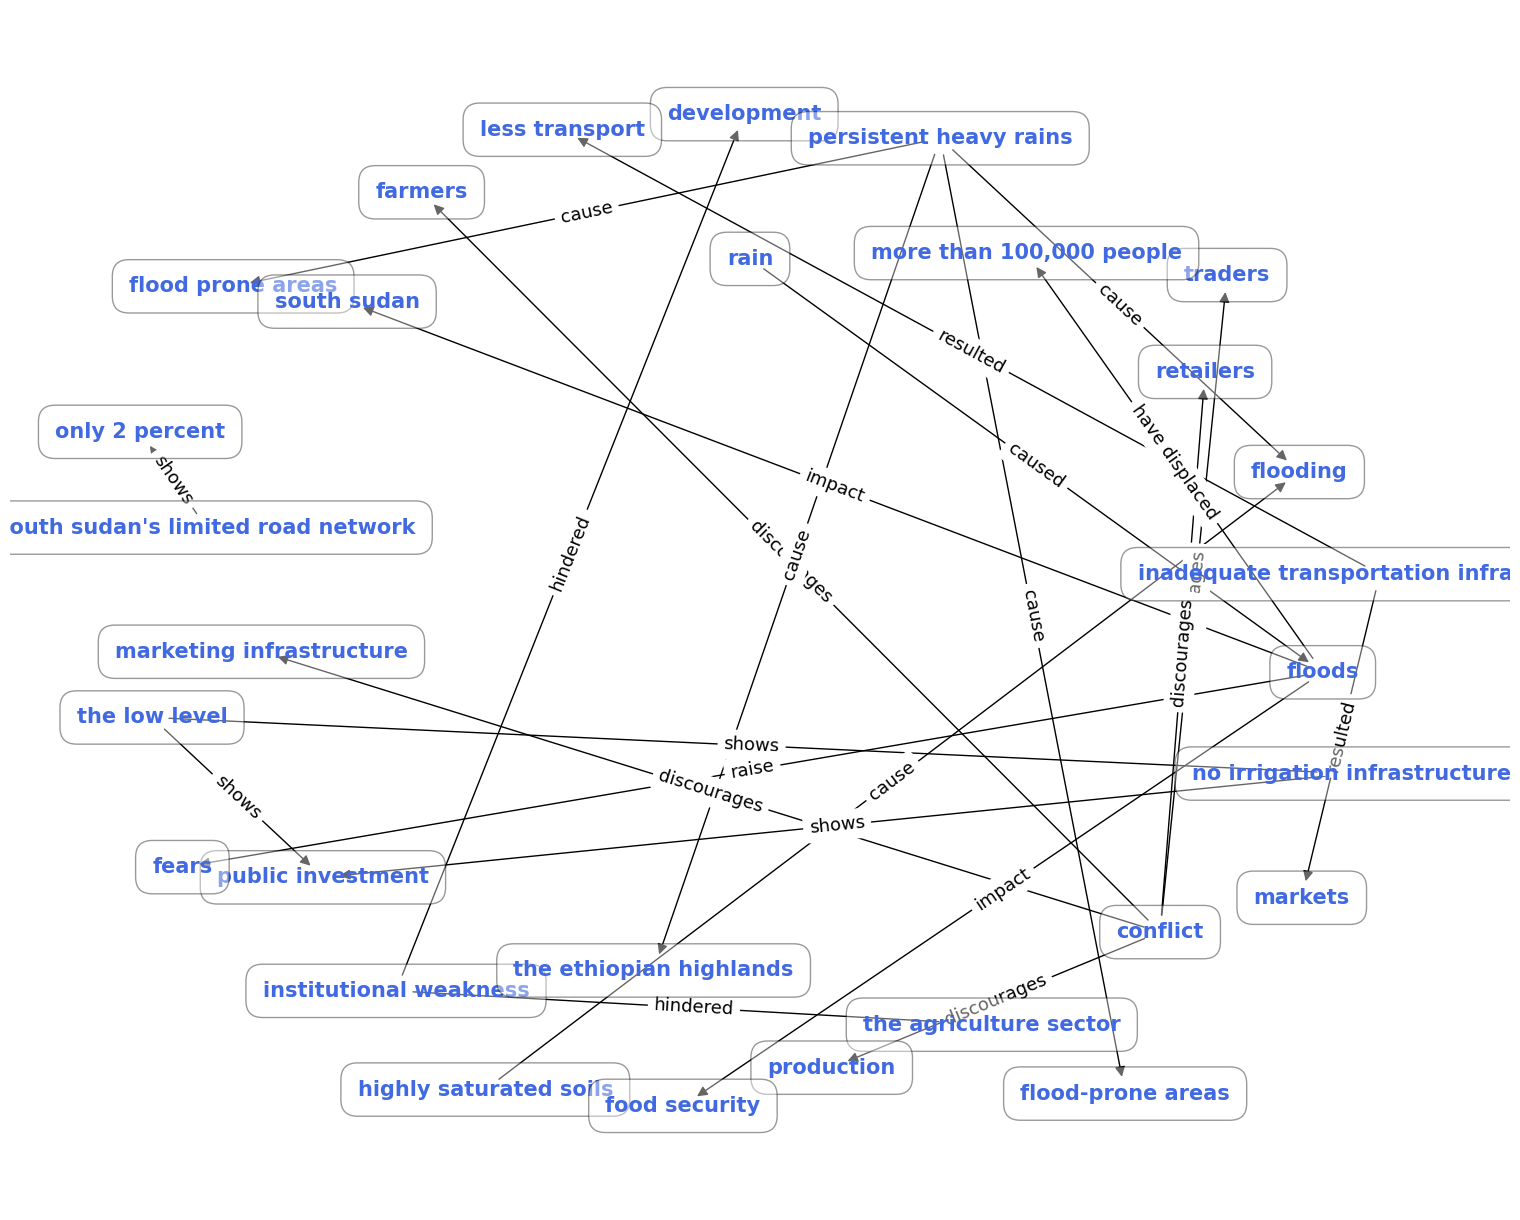

In [9]:
#new (DAG Implementation)
#without duplicates
dagCauseTriples = []
cg = nx.DiGraph()

for ce in causeffect:
    s = str(ce[0])    
    d = str(ce[2])
    #cg.add_node(s,id = str(s),title=str(s),x=615,y=200) #for d3js
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    #cg.add_node(d,id = str(d),title=str(d),x=615,y=200) #for d3js
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))
    dagCauseTriples.append(ce)
    if nx.is_directed_acyclic_graph(cg) is False:
        cg.remove_edge(s, d)
        dagCauseTriples.remove(ce)
        

print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))
for e in cg.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Make Causal Graph Fully Connected (Change value of 'ce' tuple)

Nodes: 13
Edges: 12
zulfikar ali bhutto , {'predicade': 'launched'} , nuclear program
nuclear program , {'predicade': 'declared'} , pakistan's commitment
nuclear program , {'predicade': 'declared'} , pakistan's dedication
nuclear program , {'predicade': 'developed'} , nuclear bomb
aq khan , {'predicade': 'developed'} , nuclear bomb
nuclear bomb , {'predicade': 'strengthened'} , pakistan
nuclear bomb , {'predicade': 'makes'} , nuclear power
nuclear bomb , {'predicade': 'guarantees'} , pakistan's continued existence
pakistan , {'predicade': 'must fight'} , existential threats
pakistan , {'predicade': 'must support'} , army
army , {'predicade': 'provides'} , vigilance
vigilance , {'predicade': 'strengthened'} , national survival


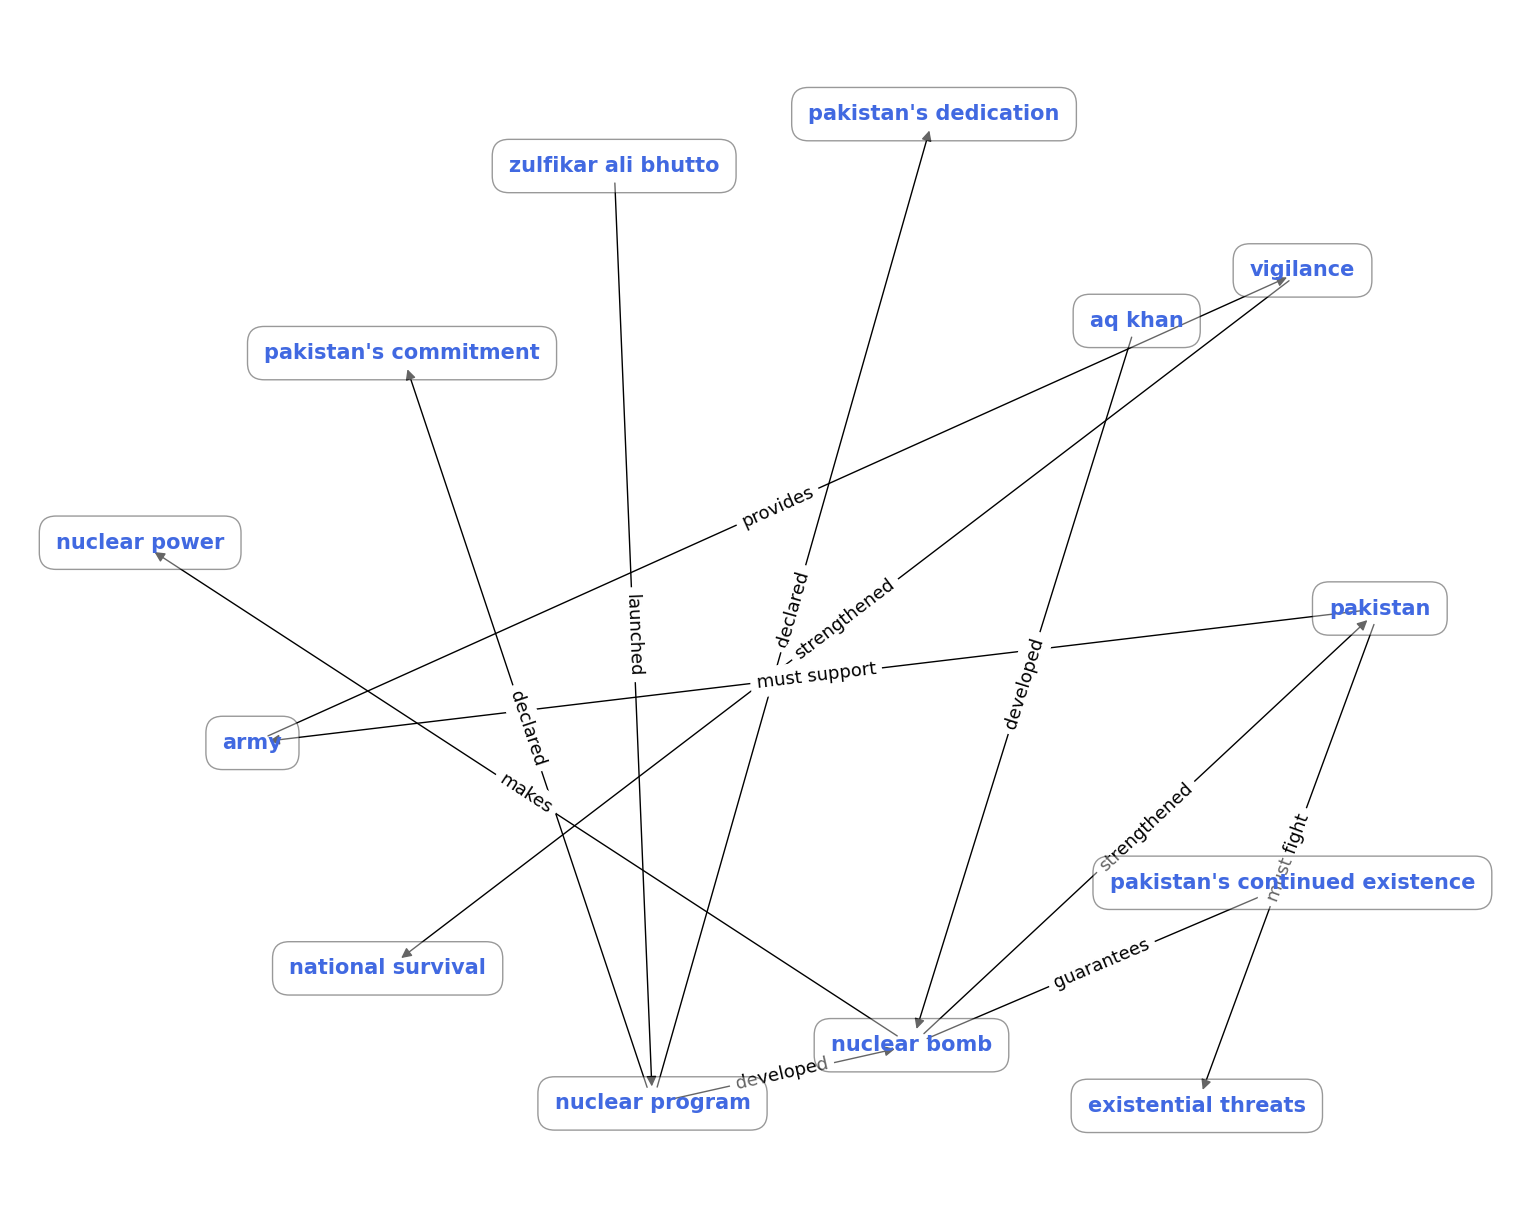

In [ ]:
ce = ("nuclear program","developed","nuclear bomb")
cg.add_edge(ce[0], ce[2], predicade=ce[1])
dagCauseTriples.append(ce)
if nx.is_directed_acyclic_graph(cg) is False:
    cg.remove_edge(ce[0], ce[2])
    dagCauseTriples.remove(ce)
else:
    print("Nodes:",len(cg.nodes))
    print("Edges:",len(cg.edges))
    for e in cg.edges(data=True):
        print(e[0],",",e[2],",",e[1])

    pos = nx.spring_layout(cg, k=4, iterations=20)
    plt.figure(figsize=(15,12))

    nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
    edge_labels = nx.get_edge_attributes(cg,'predicade')
    nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

    plt.axis('off')
    plt.show()

# Remove Duplicates from Causal Triples

In [11]:
#causeffect = list(dict.fromkeys(causeffect))

print("List before removing duplicates:")
print(len(causeffect))

#for t in causeffect:
#    print(t)
    
causalTriples = []

for ce in causeffect:
    check = False
    #print("ce:")
    #print(ce)
    if len(causalTriples) == 0:
        #print("HEY!")
        causalTriples.append(ce)
        #print("added!")
    else:
        for ct in causalTriples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            causalTriples.append(ce)
            #print("added!")

print("\nList after removing duplicates:")
print(len(causalTriples))

#for t in causalTriples:
#    print(t)

List before removing duplicates:
7

List after removing duplicates:
7


# Remove Duplicates from causalSentences

In [12]:
#causalSentences = list(dict.fromkeys(causalSentences))
#causalSentences = list(set(causalSentences))
print("List before removing duplicates:")
print(len(causalSentences))

#for t in causalSentences:
#    print(t)
    
causalSentencesNoDup = []

for ce in causalSentences:
    check = False
    #print("ce:")
    #print(ce)
    if len(causalSentencesNoDup) == 0:
        #print("HEY!")
        causalSentencesNoDup.append(ce)
        #print("added!")
    else:
        for ct in causalSentencesNoDup:
            #print("ct:")
            #print(ct)
            if str(ce) == str(ct):
                #print("duplicate")
                check = True
                break;
        if check == False:
            causalSentencesNoDup.append(ce)
            #print("added!")

print("\nList after removing duplicates:")
print(len(causalSentencesNoDup))

#for t in causalSentencesNoDup:
#    print(t)

List before removing duplicates:
7

List after removing duplicates:
7


# Causal Triples' Polarity (Whole) 

### [AllenNlp] 

In [13]:
#https://demo.allennlp.org/sentiment-analysis/roberta-sentiment-analysis
#https://paperswithcode.com/model/roberta-large-sst

#output (Pos,neg)

#sentence = "Enemies surround Pakistan."
#preds = predictor.predict(sentence)
#print(f"p(positive)={preds['probs'][0]:.2%}")
allen = []
for sent in dagCauseTriples:
    #print(sent)
    preds = predictor.predict(str(sent))
    #print(preds['label'][0])
    label = preds['label'][0]
    if label is '0':
        allen.append(-1)
    else:
        allen.append(1)
    
for causalSentence, polarity  in zip(dagCauseTriples, allen):
    print(causalSentence, polarity)

(excessive overthinking, leads, insomnia) -1
(stress, caused, insomnia) -1
(stress, results, insomnia) -1
(stress, caused, my insomnia) -1
(overthinking, can increase, anxiety) -1
(overthinking, can cause, insomnia) -1


### [Afinn]

In [14]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/

#output (Pos,neg,neural)

afinn = []
for sent in dagCauseTriples:
    #print(str(sent))
    score = afn.score(str(sent))
    #print(score)
    if score > 0:
        #print('positive')
        afinn.append(1)
    elif score < 0:
        #print('negative')
        afinn.append(-1)
    else:
        #print('neutral')
        afinn.append(0)
        
for causalSentence, polarity  in zip(dagCauseTriples, afinn):
    print(causalSentence, polarity)

(excessive overthinking, leads, insomnia) -1
(stress, caused, insomnia) -1
(stress, results, insomnia) -1
(stress, caused, my insomnia) -1
(overthinking, can increase, anxiety) -1
(overthinking, can cause, insomnia) -1


### [Vader]

In [15]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
#output (Pos,neg,neural)

vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def vader_analysis(compound):
    if compound >= 0.05:
        vader.append(1)
        return 'Positive'
    elif compound <= -0.05 :
        vader.append(-1)
        return 'Negative'
        
    elif  compound > -0.05 and compound < 0.05:
        vader.append(0)
        return 'Neutral'
    
for sent in dagCauseTriples:
    #print(sent)
    compound = vadersentimentanalysis(str(sent))
    vader_analysis(compound)
    
for causalSentence, polarity  in zip(dagCauseTriples, vader):
    print(causalSentence, polarity)

(excessive overthinking, leads, insomnia) 0
(stress, caused, insomnia) -1
(stress, results, insomnia) -1
(stress, caused, my insomnia) -1
(overthinking, can increase, anxiety) 1
(overthinking, can cause, insomnia) 0


### [SentiStrength]

In [16]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/
#output (Pos,neg)

sentiStrength = []

for sent in dagCauseTriples:
    #print(sent)
    result = senti.getSentiment(str(sent), score='binary')
    #print(result)
    
    if result[0]==1:
        #print('Positive')
        sentiStrength.append(1)
    elif result[0]==-1:
        sentiStrength.append(-1)
        #print('Negative')
    #else:
    #    print('Neutral')

for causalSentence, polarity  in zip(dagCauseTriples, sentiStrength):
    print(causalSentence, polarity)

(excessive overthinking, leads, insomnia) -1
(stress, caused, insomnia) -1
(stress, results, insomnia) -1
(stress, caused, my insomnia) -1
(overthinking, can increase, anxiety) -1
(overthinking, can cause, insomnia) 1


### Data Frame (Causal Triples Whole)

In [17]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df2 = pd.DataFrame(list(zip(dagCauseTriples, allen, afinn, vader,sentiStrength)), columns =['Causal Triple', 'AllenNLP','Afinn','Vader','SentiStrength'])
df2["Weight"] = df2.sum(axis=1)

sentPolarity = []
triplesWeight_sentLevel = []

for index, row in df2.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    triplesWeight_sentLevel.append(tripleWeightTuple)
    #print(weight)
    if weight is -4:
        sentPolarity.append('Strong Negative') 
        #print('Strong Negative')
    elif weight is -3:
        sentPolarity.append('Moderate Negative')
        #print('Moderate Negative')
    elif weight is -2:
        sentPolarity.append('Mild Negative')
        #print('Mild Negative')
    elif weight is -1:
        sentPolarity.append('Weak Negative')
        #print('Weak Negative')
    elif weight is 0:
        sentPolarity.append('Neutral')
        #print('Neutral')
    elif weight is 4:
        sentPolarity.append('Strong Positive')
        #print('Strong Positive')
    elif weight is 3:
        sentPolarity.append('Moderate Positive')
        #print('Moderate Positive')
    elif weight is 2:
        sentPolarity.append('Mild Positive')
        #print('Mild Positive')
    elif weight is 1:
        sentPolarity.append('Weak Positive')
        #print('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

c:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Causal Triple,AllenNLP,Afinn,Vader,SentiStrength,Weight,Polarity
0,"(excessive overthinking, leads, insomnia)",-1,-1,0,-1,-3,Moderate Negative
1,"(stress, caused, insomnia)",-1,-1,-1,-1,-4,Strong Negative
2,"(stress, results, insomnia)",-1,-1,-1,-1,-4,Strong Negative
3,"(stress, caused, my insomnia)",-1,-1,-1,-1,-4,Strong Negative
4,"(overthinking, can increase, anxiety)",-1,-1,1,-1,-2,Mild Negative
5,"(overthinking, can cause, insomnia)",-1,-1,0,1,-1,Weak Negative


# Plot the Polarized/Weighted Causal Graph.

Nodes: 6
Edges: 5
excessive overthinking , {'predicate': 'leads', 'polarity': 'Moderate Negative', 'weight': -0.75} , insomnia
stress , {'predicate': 'results', 'polarity': 'Strong Negative', 'weight': -1.0} , insomnia
stress , {'predicate': 'caused', 'polarity': 'Strong Negative', 'weight': -1.0} , my insomnia
overthinking , {'predicate': 'can increase', 'polarity': 'Mild Negative', 'weight': -0.5} , anxiety
overthinking , {'predicate': 'can cause', 'polarity': 'Weak Negative', 'weight': -0.25} , insomnia


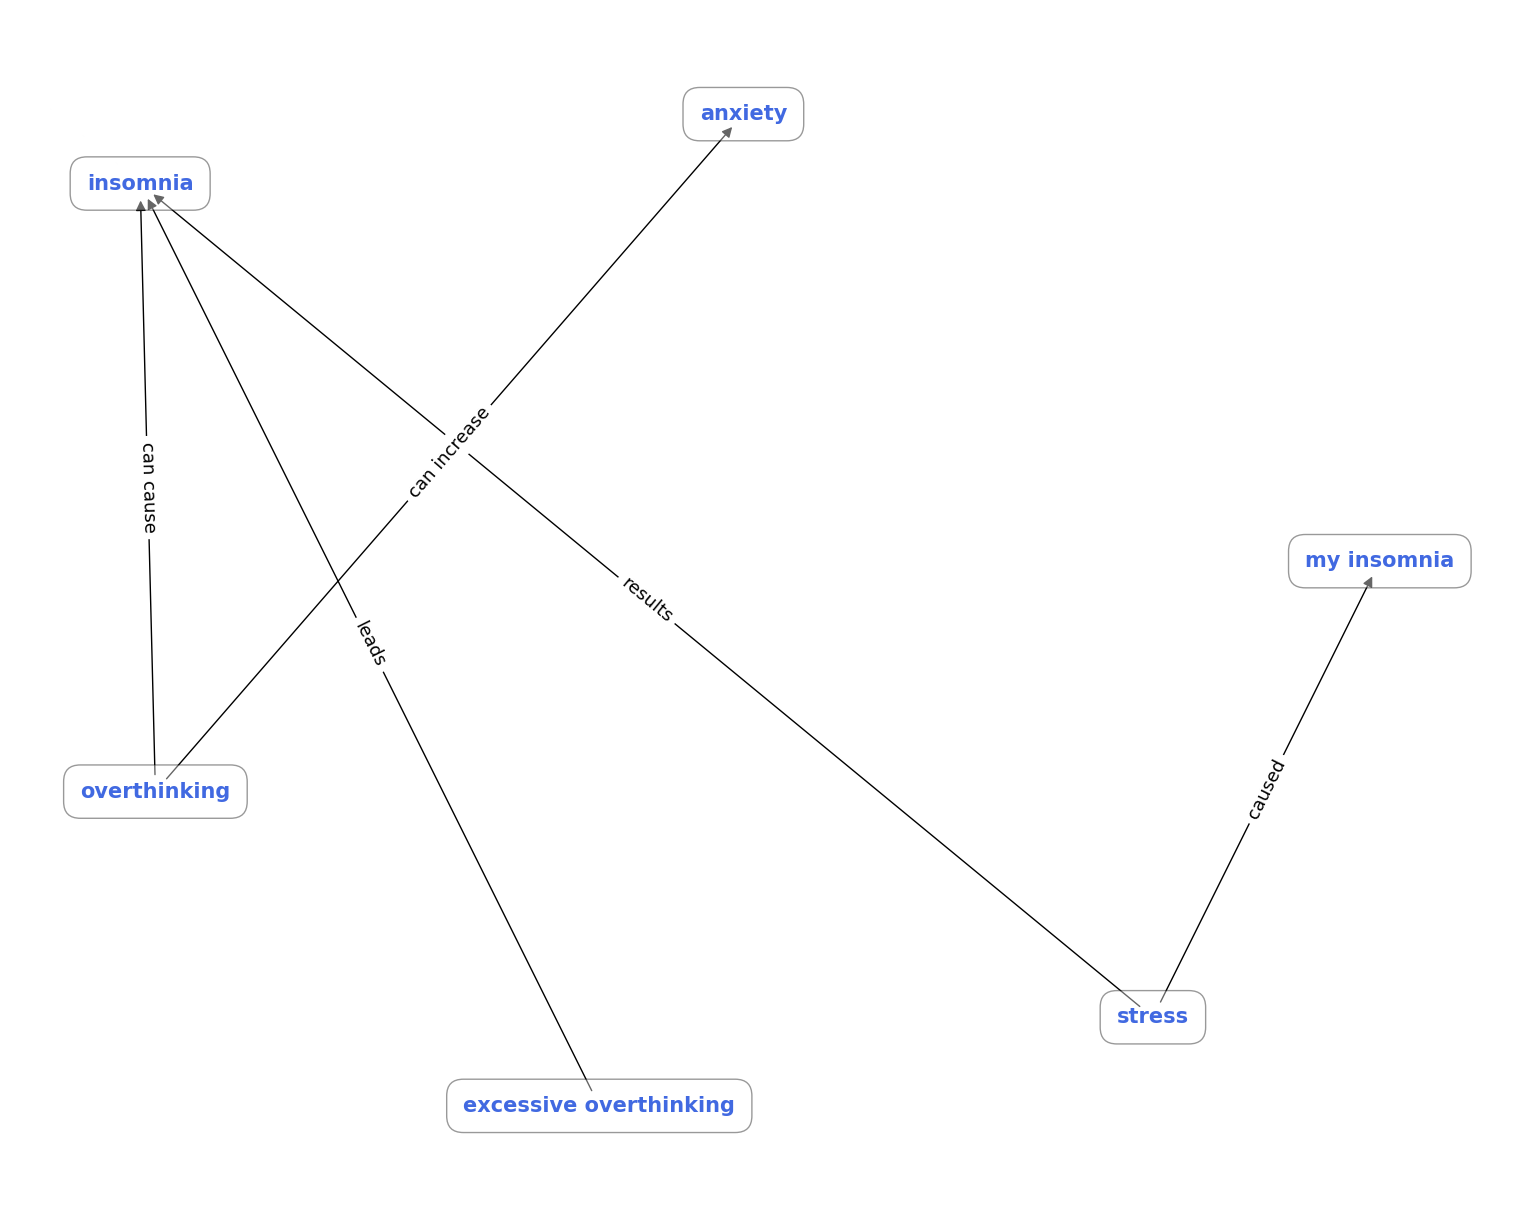

In [18]:
weights = df2["Weight"].tolist()
polarities = df2["Polarity"].tolist()
cwg = nx.DiGraph()

for ce,p,w in zip(dagCauseTriples, polarities,weights):
    s = str(ce[0])    
    d = str(ce[2])
    w = w/4
    cwg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    cwg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cwg.add_edge(s, d, predicate=str(ce[1]), polarity = p, weight = w)
    
print("Nodes:",len(cwg.nodes))
print("Edges:",len(cwg.edges))
for e in cwg.edges(data=True):
    print(e[0],",",e[2],",",e[1])
    #for nbr, eattr in e[2].items():
    #    if nbr == "weight":
    #        print(eattr)

pos = nx.spring_layout(cwg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cwg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cwg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cwg,'predicate')
#edge_labels2 = nx.get_edge_attributes(cwg,'polarity')
#edge_labels3 = nx.get_edge_attributes(cwg,'weight')

nx.draw_networkx_edge_labels(cwg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Plot the Polarized Causal Graph on using Pyvis "Polarized Causal Graph.html" file

In [19]:
nt = Network("660px", "1515px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Polarized Causal Graph')

for dm,p,w in zip(dagCauseTriples, polarities,weights):
    #color = "#ffffff"
    nt.add_node(str(dm[0]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_node(str(dm[2]),shape = 'box',physics='false',color = "#ffffff")
    w=w/4
    nt.add_edge(str(dm[0]),str(dm[2]),label=str(dm[1]) + " ("+str(p)+" "+str(w)+")", weight=10, physics='false',color='black')

#nt.show_buttons(filter_=['physics'])
nt.set_edge_smooth('discrete')
nt.show("./Pyvis Graph/Polarized Causal Graph.html")

# Compute CPs using CAST Logic

In [20]:
def FromTruthTable(i,inputs):
    count = 0

    # if inputs==1:
    #     for a in range(0,2):
    #         if i == a:
    #            return (a)

    if inputs==1:
        for a in range(1, -1, -1):
            if i == count:
               return (a)
            count = count+1
                
    # if inputs==2:
    #     for a in range(0,2):
    #         for b in range(0,2):
    #             if i == count:
    #                 t = (a,b)
    #                 return t
    #             count = count+1

    if inputs==2:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                if i == count:
                    t = (a,b)
                    return t
                count = count+1
        
    elif inputs==3:
        for a in range(1, -1, -1):
           for b in range(1, -1, -1):
              for c in range(1, -1, -1):
                 if i == count:
                     t = (a,b,c)
                     return t
                 count = count+1
    
    elif inputs==4:
        for a in range(1, -1, -1):
           for b in range(1, -1, -1):
              for c in range(1, -1, -1):
                 for d in range(1, -1, -1):
                    if i == count:
                        t = (a,b,c,d)
                        return t
                    count = count+1

def GetCAstLogicStrength(polarity):
    if polarity == "Strong Negative":
        return -0.9
    elif polarity == "Moderate Negative":
        return -0.6
    elif polarity == "Mild Negative":
        return -0.6
    elif polarity == "Weak Negative":
        return -0.3
    elif polarity == "Neutral":
        return 0.1
    elif polarity == "Weak Positive":
        return 0.3
    elif polarity == "Mild Positive":
        return 0.6
    elif polarity == "Moderate Positive":
        return 0.6
    elif polarity == "Strong Positive":
        return 0.9
    
class Tutorial1:
    #def __init__(self):
    def Add(self, net, id ,name, outcomes, x_pos, y_pos):
        e = self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos)
        #net.add_arc("Economy", "Forecast");
        #net.add_arc("Node0", "Node1");
        #nodeHandles.append(self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos))
        nodeNames.append(net.get_node_name(e))
        nodeIds.append(net.get_node_id(e))
        nodeHandles.append(e)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def AddArcs(self, net, s, d):
        net.add_arc(s, d)
        net.write_file("./GeNie CBN/CBN.xdsl")

    def Addcpts(self, net, h, cpt):
        net. set_node_definition(h, cpt)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def create_cpt_node(self, net, id, name, outcomes, x_pos, y_pos):
        handle = net.add_node(pysmile.NodeType.CPT, id)
        net.set_node_name(handle, name)
        net.set_node_position(handle, x_pos, y_pos, 85, 55)
        initial_outcome_count = net.get_outcome_count(handle)
        for i in range(0, initial_outcome_count):
            net.set_outcome_id(handle, i, outcomes[i])
        for i in range(initial_outcome_count, len(outcomes)):
            net.add_outcome(handle, outcomes[i])
        return handle
    
    def print_cpt_matrix(self, net, node_handle):
        cpt = net.get_node_definition(node_handle)
        return cpt
    

net = pysmile.Network()
obj = Tutorial1()
outcomes = ["True","False"]
nodeNames = []    
nodeIds = []
nodeHandles = []
cpts=[]
baseline = 0.1
x = 160
y = 40

for node in cwg.nodes: 
    obj.Add(net, str(node),str(node), outcomes, x, y)
    #x = x + 100
    #y = y + 100
        
for e in cwg.edges():
    for id,name in zip(nodeIds,nodeNames):
        if name == e[0]:
            s = id
        if name == e[1]:
            d = id 
    obj.AddArcs(net, s, d)
    
for handle,name in zip(nodeHandles,nodeNames): 
    print("Handle:" + str(handle))
    print("Node:" + name)
    print(net.get_outcome_ids(handle))
    parent_ids = net.get_parent_ids(handle)
    num_parents = len(parent_ids)
    print("Number of Parents:" + str(num_parents))
    cpt = []
    parent_names = []
    totalCols = 1
    if num_parents == 0:
        cpt.append(baseline)
        cpt.append(1 - baseline)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")
    elif num_parents > 0:
        for par in parent_ids:
                parent_names.append(net.get_node_name(par))
                #totalCols = totalCols * (num_parents * 2)
                totalCols = 2 ** num_parents
                #totalCols = totalCols + totalCols
        print("Names of Parents:" + str(parent_names))
        print("totalCols:" + str(totalCols))
        for j in range(0, totalCols):
            print("j: "+str(j))
            PI = 1
            NI = 1
            ans = FromTruthTable(j,num_parents)
            print("From Dummy: "+str(ans))
            #for parent in parent_names:
            for p in range(0,len(parent_names)):
                for edge in cwg.edges(data=True):
                    if str(parent_names[p]) == str(edge[0]) and str(name) == str(edge[1]):
                        for nbr, eattr in edge[2].items():
                            if nbr == "polarity":
                                #print(eattr)
                                #polarities.append(eattr)
                                polarity = GetCAstLogicStrength(eattr)
                        break
                print("Parent: " + parent_names[p])
                print("Polarity: " + str(polarity))
                print("p: "+str(p))
                if num_parents > 1:
                    if ans[p] == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                else:
                    if ans == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                if polarity >= 0:
                    #polarity = polarity/4
                    PI = PI * (1 - polarity)
                else:
                    #polarity = polarity/ (-4)
                    NI = NI * (1 - abs(polarity))
            PI = 1 - PI
            NI = 1 - NI
            AI = abs(PI - NI) / (1 - min(PI, NI))  
            CP = 0
            if PI > NI:
                CP = baseline + ((1 - baseline) * AI)
            elif PI < NI:
                CP = baseline - (baseline * AI)
            elif PI == NI:
                CP = baseline
            cpt.append(round(CP, 3))
            cpt.append(round((1 - CP), 3))
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")

Handle:0
Node:excessive overthinking
['True', 'False']
Number of Parents:0
CPT:[0.1, 0.9]
CPT from Network:
[0.1, 0.9]
********************************************************************
Handle:1
Node:insomnia
['True', 'False']
Number of Parents:3
Names of Parents:['excessive overthinking', 'stress', 'overthinking']
totalCols:8
j: 0
From Dummy: (1, 1, 1)
Parent: excessive overthinking
Polarity: -0.6
p: 0
Parent: stress
Polarity: -0.9
p: 1
Parent: overthinking
Polarity: -0.3
p: 2
j: 1
From Dummy: (1, 1, 0)
Parent: excessive overthinking
Polarity: -0.6
p: 0
Parent: stress
Polarity: -0.9
p: 1
Parent: overthinking
Polarity: -0.3
p: 2
New Polarity: 0
j: 2
From Dummy: (1, 0, 1)
Parent: excessive overthinking
Polarity: -0.6
p: 0
Parent: stress
Polarity: -0.9
p: 1
New Polarity: 0
Parent: overthinking
Polarity: -0.3
p: 2
j: 3
From Dummy: (1, 0, 0)
Parent: excessive overthinking
Polarity: -0.6
p: 0
Parent: stress
Polarity: -0.9
p: 1
New Polarity: 0
Parent: overthinking
Polarity: -0.3
p: 2
New P

In [ ]:
print(FromTruthTable(0,4))

(1, 1, 1, 1)
